## Here I tried to show some analysis using the Google Apps data.

## 1 - Reading and reviewig the App data

I get this dataset from Datacamp and I am trying to analyse using this dataset. The data have 13 features and we will see some analysis techniques

In [3]:
#### Importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Read in dataset
app_data = pd.read_csv('apps.csv')
app_data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
## Drop duplicates from the dataset
app_data = app_data.drop_duplicates()

In [7]:
# # Print the total number of features and observations
app_data.shape

(9659, 14)

In [8]:
#  we have to look the five rows from the data
print(app_data.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

## 2 - Data Cleaning

If we look carefully on some of the features of the dataset, there are characters that needs cleaning. On the 'Installs' and 'Price' columns, there are like comma, plus and dashes which are not helpfull for this analysis.

In [9]:
# List of characters to remove
chars_to_remove = ['+', ',', '$', ' ']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean and chars_to_remove
for col in cols_to_clean:
    for char in chars_to_remove:
        app_data[col] = app_data[col].apply(lambda x: x.replace(char, ''))

It is a good practice to print the summary using the info().

In [10]:
# Print a summary of the apps dataframe
print(app_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3 - checking and Correcting data types

If we see the Installs and Price columns, the data types are object. This may be bacause they have some mixed inputs. 

In [11]:
# Convert Installs to float data type
app_data['Installs'] = app_data['Installs'].astype('float')

# Convert Price to float data type
app_data['Price'] = app_data['Price'].astype('float')

In [12]:
# Checking dtypes of the apps dataframe
print(app_data['Price'].dtype)
print(app_data['Installs'].dtype)

float64
float64


## 4. Exploring app categories

We can determine which category is the highest share in the App market and if there is any category dominating the market.

In [13]:
# Print the total number of unique categories
num_categories = app_data['Category'].unique()
print('Number of categories = ', num_categories)

Number of categories =  ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [14]:
# Count the number of apps in each 'Category'. 
num_apps_in_category = app_data['Category'].value_counts().sort_values(ascending = False)
# num_apps_in_category

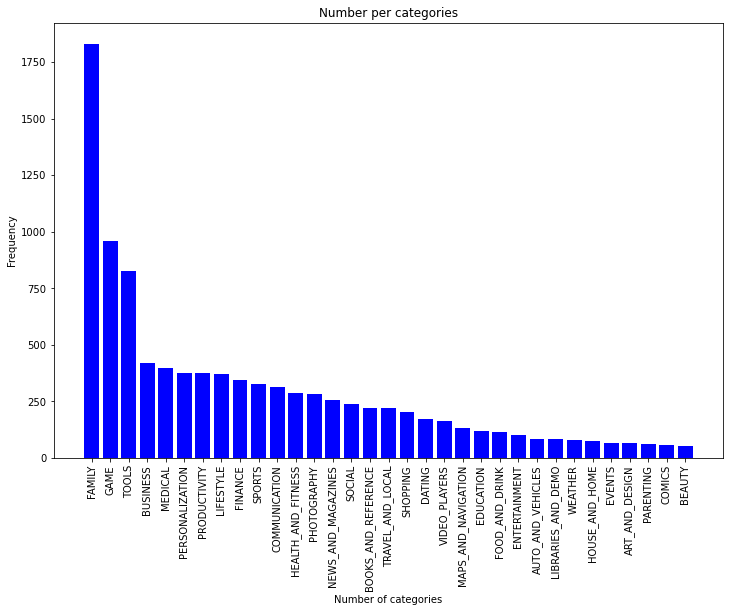

In [15]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.bar(num_apps_in_category.index, num_apps_in_category.values, color = 'blue')
plt.title("Number per categories")
ax.set_xlabel("Number of categories")
ax.set_ylabel("Frequency")
ax.set_xticks(num_apps_in_category.index)
ax.set_xticklabels(num_apps_in_category.index, rotation = 90)
plt.show()

In [16]:
## Using Seaborn library

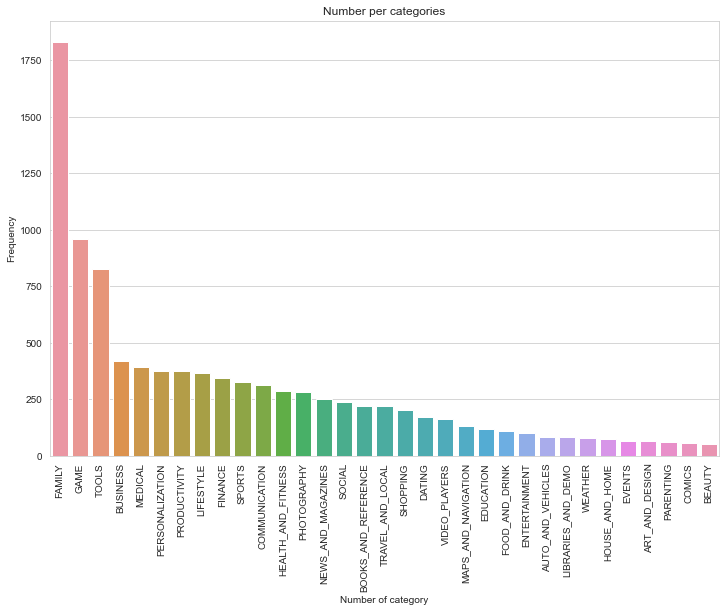

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

order1 = app_data['Category'].value_counts().index.tolist()

ax = sns.countplot(data = app_data, x = 'Category', order = order1)
ax.set_title("Number per categories")
ax.set_xlabel("Number of category")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## 5. Distribution

Lets look at the distribution of rating of the data

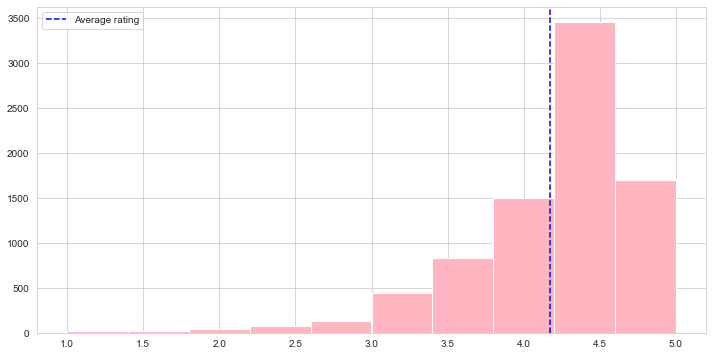

In [18]:
plt.figure(figsize = (12,6))

Average_rating = app_data['Rating'].mean()

plt.hist(app_data['Rating'], color = 'lightpink')
plt.axvline(x = Average_rating, color = 'b', linestyle = '--', label = "Average rating")
plt.legend()
plt.show()

## 6. Size and Price 

Now lets also see the size and price of the App. IF the size of the App is too large, it may be difficult for users to download. Besides, the price of the App is also a factor for users. We can question if the size and/or price of the App may affect the rating. 

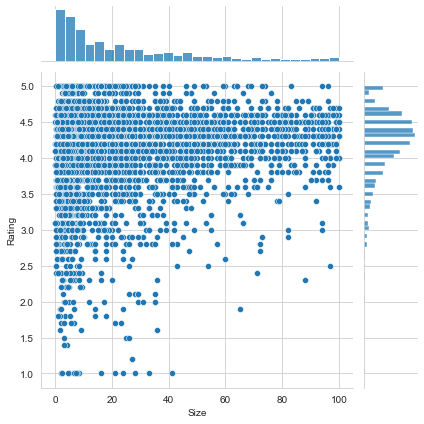

In [19]:
app_size_price = app_data[(~app_data['Rating'].isnull()) & (~app_data['Size'].isnull())]

cat_200 = app_size_price.groupby('Category').filter(lambda x: len(x) > 200)
sns.jointplot(x = cat_200['Size'], y = cat_200['Rating'])
plt.show()

From the above plot, we can observe that majority of the top rated Apps are from 2MB to 40MB

##### Lets see only for Type == paid :

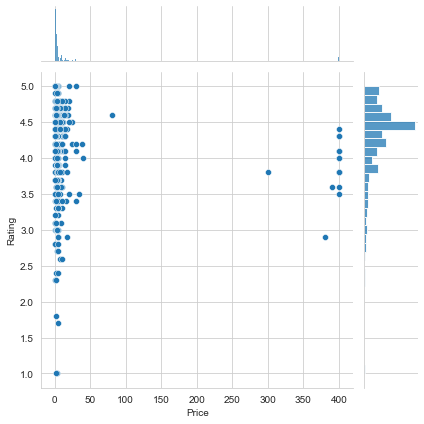

In [20]:
app_paid = app_size_price[app_size_price['Type'] == 'Paid']
sns.jointplot(x = app_paid['Price'], y = app_paid['Rating'])
plt.show()

---> And from the above plot, majority of the Apps are under $10.

## 7. Relationships between the App category and price

In part 4-Exploring app categories, it was demonstrated some of the most popular app categories.

In [21]:
popular_app_cats = app_data[app_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

In [22]:
# Apps whose Price is greater than 300
apps_above_300 = popular_app_cats[popular_app_cats['Price'] > 300]
apps_above_300[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99
4406,FAMILY,I Am Rich Pro,399.99


In this below box plot, most of the apps price is below $50.

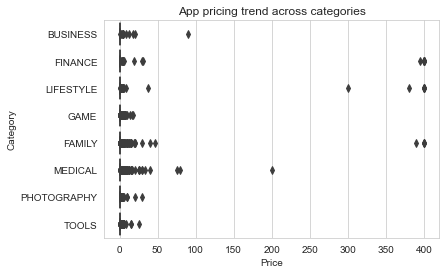

In [23]:
ax = sns.boxplot(x = "Price", y = "Category", data = popular_app_cats)
ax.set_title('App pricing trend across categories')
plt.show()

## 8. Filtering not useful Apps

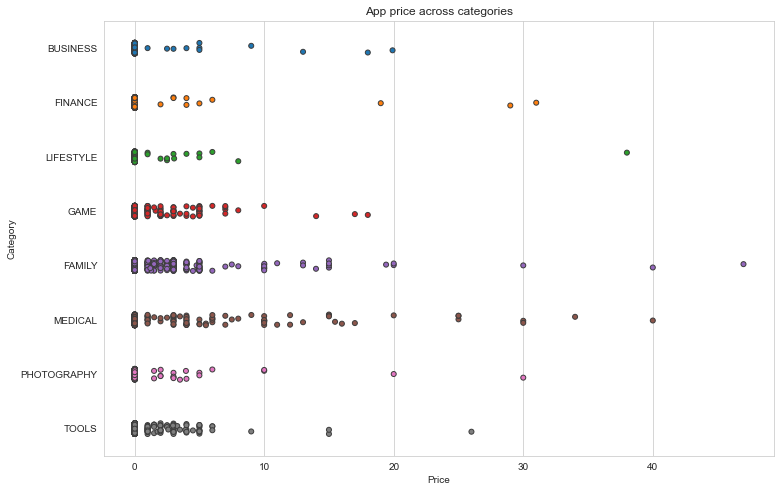

In [24]:
# Select apps priced below $100
under_50 = popular_app_cats[popular_app_cats['Price'] < 50]

fig, ax = plt.subplots(figsize = (12,8))

ax = sns.stripplot(x = 'Price', y = 'Category', data = under_50, jitter = True, linewidth = 1)
ax.set_title('App price across categories')
plt.show()

## 9. Popularity of paid apps vs free apps¶

In [25]:
app_data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [26]:
installs_type = app_data.groupby('Type')["Installs"]
installs_by_type = [installs_type.get_group(t) for t in installs_type.groups]


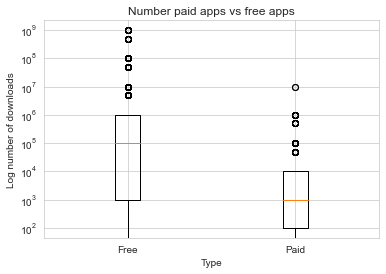

In [27]:
# Group the Installs data by Type
installs_type = app_data.groupby('Type')["Installs"]

# Create a list of the Installs data for each Type
installs_by_type = [installs_type.get_group(t) for t in installs_type.groups]

# Create a box-and-whisker plot of Installs for each Type
plt.boxplot(installs_by_type, labels=installs_type.groups)

# Add axis labels and title
plt.xlabel('Type')
plt.ylabel('Log number of downloads')
plt.title('Number paid apps vs free apps')

# Set the y-axis to log scale and show the plot
plt.yscale('log')

plt.show()


Lets also see how to plot the same plot using seaborn.

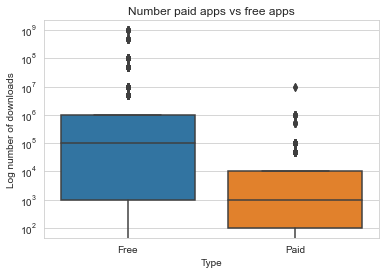

In [28]:
sns.boxplot(x='Type', y='Installs', data = app_data)

plt.xlabel('Type')
plt.ylabel('Log number of downloads')
plt.title('Number paid apps vs free apps')
plt.yscale('log')

plt.show()
